# Анализ  данных о качестве и цене вин в 37 странах

### Описание проекта

Данные относятся к одному месяцу лета (июнь 2017 г.) и были собраны с веб-сайта магазина , расположенного в Соединенных Штатах.
Для оценки используется рейтинговая шкала (1-100) Wine Enthusiast Magazine. Они публикуют рейтинги только от (80-100) на своем сайте.

### Описание данных wine_reviews.csv.csv

* Country - страна происхождения вина.
* Description - описание вкусового профиля вина.
* Designation - виноградник, откуда берется виноград для вина.
* Points - Количество баллов, в которых журнал Wine Enthusiast оценил вино по шкале 1-100.
* Price - стоимость одной бутылки вина.
* Province - провинция или штат, из которого родом вино.

* Region 1 - Винодельческий район в провинции или штате (например, долина Напа в Калифорнии).

* Region 1 - (Необязательно) Более специфический регион в винодельческом регионе (например, Резерфорд в долине Напа).

* Variety - тип винограда, используемого для изготовления вина (например, Пино Нуар).

* Winery - Винодельня, которая производила вино.

### Шаг 1. Открытие файла с данными и изучение общей информации

* Путь к файлу: /wine_reviews.csv

### Шаг 2. Подготовка данных

* Заменить названия столбцов (привести к нижнему регистру).
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.
* Обработать пропуски при необходимости.
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать.
* Описать причины, которые могли привести к пропускам.

### Шаг 3. Провести исследовательский анализ данных

* Посмотреть, сколько всего стран представлено в данных.Какие самые рейтинговые из них? 
* Посмотреть, как сосредоточены усредненные цены по странам. Кто в лидерах? А кто с конца рейтинга?
* Посмотреть в каких странах, представленных в наших данных, самые дорогие вина?А в каких самые дешевые?
* Определить, кто получает максимальные оценки,  а у кого наименьший балл?
* Определить какие сорта для производства вина наиболее популярны?Сколько их всего?
* Какие страны лидируют по отзывам и ценам? Выбрать группы стран для дальнейшего анализа.
* Построить график «ящик с усами» по всем данным о ценах с разбивкой по странам. Велика ли разница между странами? Описать результат.
* Посмотреть, как влияют цены(и в какой степени) в странах производителях вина на качество их продукции(рейтинги). Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
* Посмотреть на общую картину по всем данных по странам и по ценам в зависимости от рейтингов. Что можно обобщенно о ценах рассказать? Можно ли выделить оптимальный интервал - попадание в который гарантировало бы лучшее соотношение в сочетании цена-качество?

### Шаг 4. Составить портрет  региона
  Определить для каждого региона:
* Самые дорогие вина для группы стран в зависимости от выбранного региона.
* Самые дешевые вина для группы стран в зависимости от выбранного региона.
* Самые популярные вина для группы стран в зависимости от выбранного региона. 
* Усредненные оценки цен вина для группы стран в зависимости от выбранного региона. 
* Сделать обобщенное сравнение цен для выбранной группы стран одного континента и другого.

### Шаг 5. Проведите исследование статистических показателей
 
* Как изменяется цены в выбранных странах?
* Посчитать среднее количество и стандартное отклонение. 
* Построить гистограммы. Описать распределения.

### Шаг 6. Проверка гипотез

* Средние пользовательские цены для выбранных стран Европы и Америки отличаются от средней цены по всем странам.
* Средние пользовательские цены выбранных стран Европы и Америки одинаковые.
Задать самостоятельно пороговое значение alpha. Пояснить: 
* Как сформулирована нулевую и альтернативную гипотезы.
* Какой критерий применен для проверки гипотез и почему.

### Шаг 7. Вывод

# 1. Открытие файла и получение общей информации

In [1]:
# вызов библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
from scipy import stats as st
import scipy
# импорт библиотеки warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# чтение файла
df=pd.read_csv('wine_reviews.csv')
# просмотр общей информации о датасете
df.info()
# вывод на экран датасета
display(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni


# 2. Подготовка данных

Заменим названия столбцов (приведем к нижнему регистру)


In [2]:
df.columns = df.columns.str.lower()

Посмотрим на данные сколько пропусков в существенных для анализа столбцах

Text(0.5, 1.0, 'Рисунок 1 - Пропуски в данных до обработки')

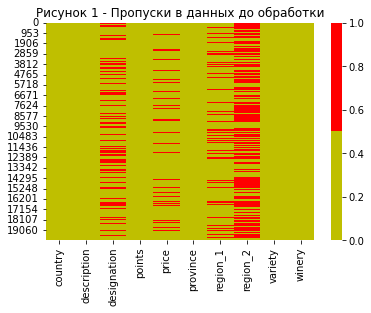

In [3]:
colours = ['y', 'r'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
plt.title('Рисунок 1 - Пропуски в данных до обработки')

Из существеных пропусков в данных, которые могут повлиять на анализ - это пропуски в столбах 
"Цена", нужно рассчитать влияние удаления отсутствующих цен из набора данных на дальнейший анализ.

In [4]:
total_records = len(df)
missing_prices = df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Отсутствуют цены за товар: {}".format(missing_prices)+ "\n" +
      "Всего записей: {}".format(total_records) + "\n" + 
      "Какой процент остается после удаления: {:.2f}%".format(missing_ratio))

Отсутствуют цены за товар: 1802
Всего записей: 20000
Какой процент остается после удаления: 90.99%


Если мы удалим все записи с отсутствующими ценами, у нас останется 90,99% набора данных. Мы можем спокойно отбрасывать записи с пропущенными значениями и это не сильно повлияет на результаты.

In [5]:
df.shape

(20000, 10)

In [6]:
df = df.dropna(how="any", subset=["price"])

In [7]:
df.shape

(18198, 10)

Text(0.5, 1.0, 'Рисунок 2 - Пропуски в данных после обработки')

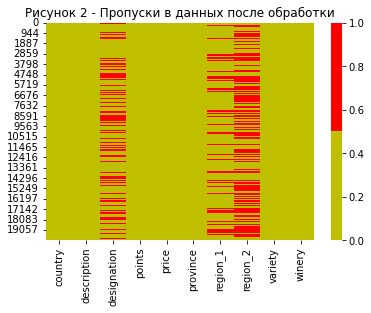

In [8]:
colours = ['y', 'r'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
plt.title('Рисунок 2 - Пропуски в данных после обработки')

Удалим дубликаты:

In [9]:
df.drop_duplicates()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19994,US,"A little too strong in feline spray character,...",Grand Reserve,84,20.0,California,Mendocino County,Mendocino/Lake Counties,Sauvignon Blanc,Kendall-Jackson
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata


In [10]:
df.shape

(18198, 10)

In [11]:
display(df)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19994,US,"A little too strong in feline spray character,...",Grand Reserve,84,20.0,California,Mendocino County,Mendocino/Lake Counties,Sauvignon Blanc,Kendall-Jackson
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata


Ну вот - данные готовы для анализа. Приступаем к анализу.

# 3. Исследовательский анализ данных

In [12]:
#Подсчет количества выставленных рейтингов по каждой стране
df.groupby('country')['points'].count().sort_values(ascending=False)

country
US                        8207
Italy                     2472
France                    1929
Spain                     1074
Chile                      775
Argentina                  728
Australia                  617
Portugal                   595
New Zealand                417
Germany                    353
Austria                    337
South Africa               301
Greece                     110
Israel                      86
Hungary                     34
Canada                      24
Croatia                     21
Romania                     18
Moldova                     16
Mexico                      14
Slovenia                    12
Turkey                      11
Bulgaria                    10
Uruguay                      7
Georgia                      6
Cyprus                       6
Lebanon                      4
Brazil                       3
Serbia                       2
China                        2
Montenegro                   1
Luxembourg                   1


Видим, что наибольшее количество рейтингов у вин из США , Италии, Франции.
В данных есть значение(всего одно) US-France - заменим на US чтобы не путать с US. На качестве анализа данных это никак не отразится и избавит от путаницы.

In [13]:
df.loc[df['country'] == 'US-France', 'country'] = 'US'

In [14]:
# сортировка столбца цены по стране - средняя цена
df.groupby(by='country').agg({'price':'mean'}).sort_values(by='price', ascending=False).head()

,price
country,
Hungary,60.911765
France,46.297564
Canada,45.750000
Italy,37.177184
Luxembourg,36.000000


В среднем наиболее дорогие  вина в Венгрии, Франции и Канаде

In [15]:
# сортировка столбца цены по стране - средняя цена
df.groupby(by='country').agg({'price':'mean'}).sort_values(by='price', ascending=False).tail()

,price
country,
Romania,12.5
Bosnia and Herzegovina,12.0
South Korea,11.0
Bulgaria,10.6
Montenegro,10.0


В среднем самые недорогие вина в  Южной Корее, Болгарии и Монтенегро.

Общая картина по средним ценам в зависимости от страны на графике:

Text(0, 0.5, 'Страна')

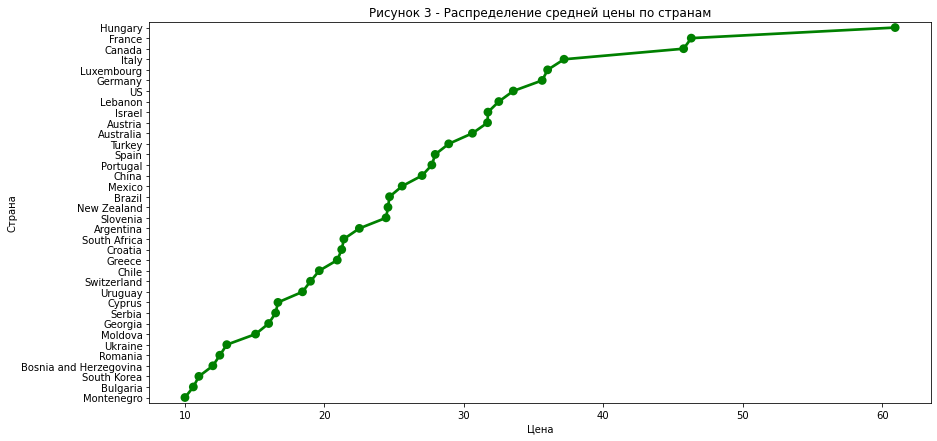

In [16]:
cnt = df.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(14,7))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='g',orient='h',markers='o')
plt.title('Рисунок 3 - Распределение средней цены по странам')
plt.xlabel('Цена')
plt.ylabel('Страна')

Посмотрим цены по их крайним значениям (Макс,Мин) и тоже по странам:

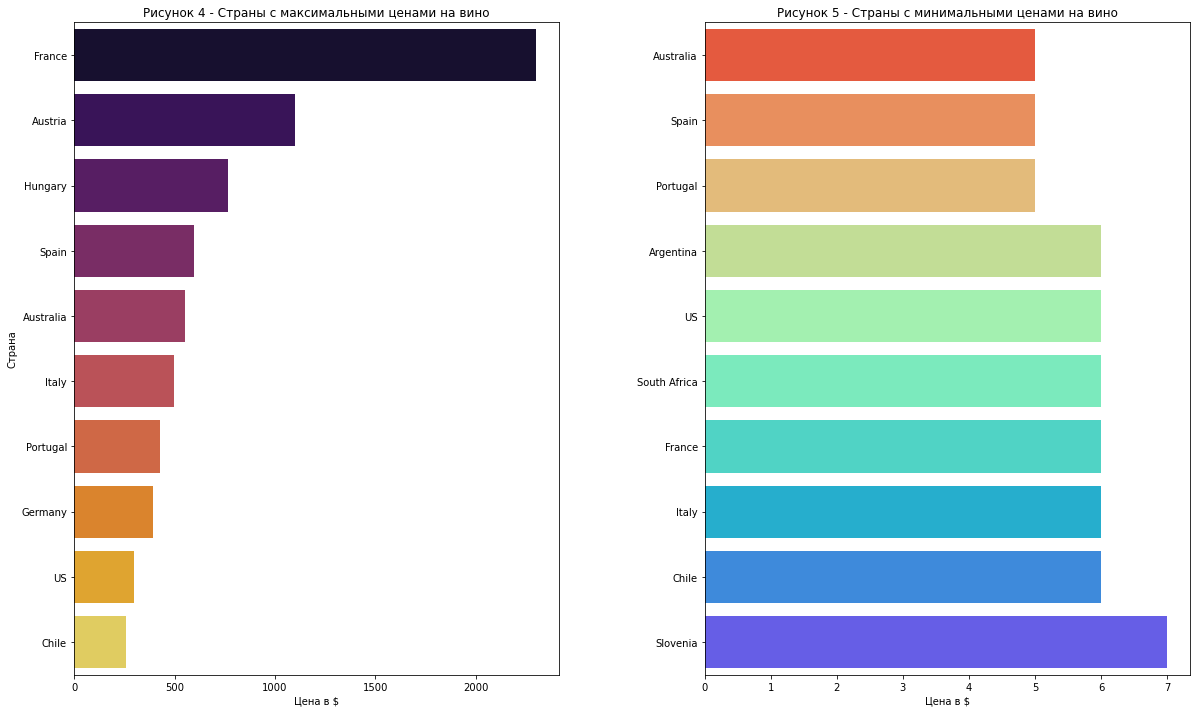

In [17]:
fig,ax = plt.subplots(1,2,figsize=(20,12))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:10]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 4 - Страны с максимальными ценами на вино')
ax1.set_ylabel('Страна')
ax1.set_xlabel('Цена в $')
cnt = df.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:10]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Рисунок 5 - Страны с минимальными ценами на вино')
ax2.set_ylabel('')
ax2.set_xlabel('Цена в $')
plt.subplots_adjust(wspace=0.3);

Для полноты картины посмотрим эти данные на боксплоте(прологарифмировав предварительно для лучшей визуализации):

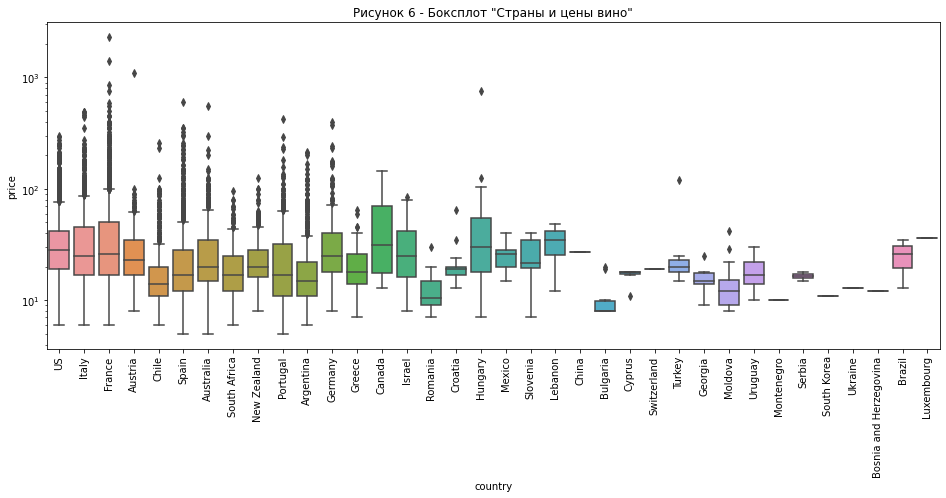

In [18]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df['country'], y = df['price'])
plt.yscale("log")
plt.title('Рисунок 6 - Боксплот "Страны и цены вино"')
plt.xticks(rotation=90);

Франция продает дорогое вино, за ней следует Австрия и Венгрия.
Вино по самой низкой цене 5 доллара в Португалии, Испании, Австралии.
В большинстве европейских стран продается широкий ассортимент вин.

Также интересно посмотреть как распределяется рейтинг в наших данных (Тоже по странам c наибольшим рейтингом и с наименьшим).

In [19]:
df['points'].describe()

count    18198.000000
mean        87.788054
std          3.236323
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64

Средний рейтинг 87.7 баллов

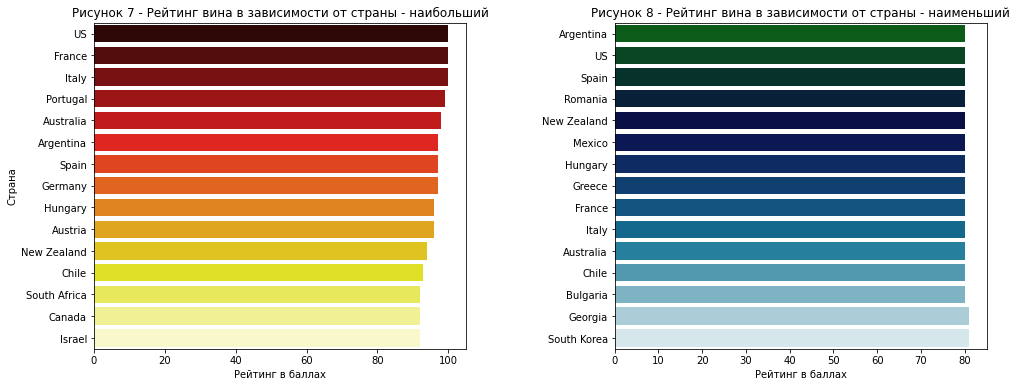

In [20]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Рисунок 7 - Рейтинг вина в зависимости от страны - наибольший')
ax1.set_ylabel('Страна')
ax1.set_xlabel('Рейтинг в баллах')
cnt = df.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Рисунок 8 - Рейтинг вина в зависимости от страны - наименьший')
ax2.set_ylabel('')
ax2.set_xlabel('Рейтинг в баллах')
plt.subplots_adjust(wspace=0.4);

Ну и так же как и с ценами посмотрим на боксплоте:

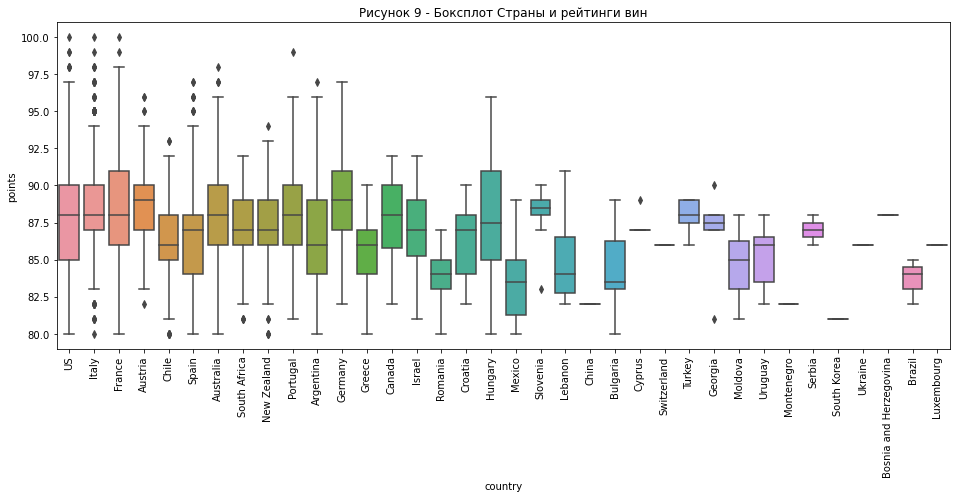

In [21]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df['country'], y = df['points'])
plt.title('Рисунок 9 - Боксплот Страны и рейтинги вин')
plt.xticks(rotation=90);

* Рейтинг вина варьируется от 0 до 100, но наименьший рейтинг - 80.
* Вино, произведенное в США,Франции, Италии и Португалии получает высшую оценку.
* Вино, произведенное в Аргентине, Мексике, Новой Зеландии и Румынии с наименьшим рейтингом. 


Интересно исследовать зависимость от сорта винограда и цены, и еще сорта от рейтинга. Посмотрим на графике:

Всего сортов винограда для вин 406


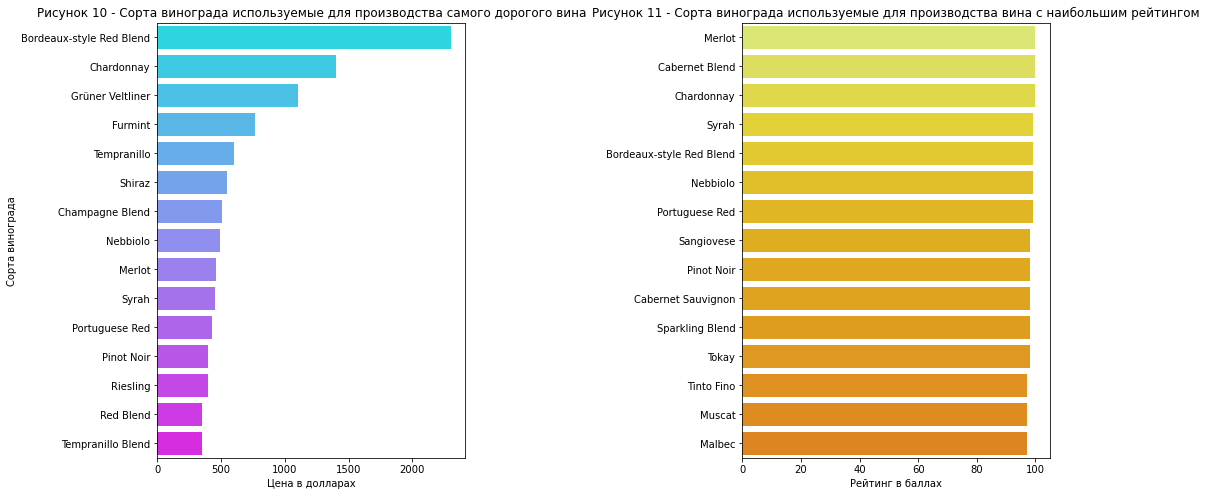

In [22]:
print('Всего сортов винограда для вин',df['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('Рисунок 10 - Сорта винограда используемые для производства самого дорогого вина')
ax1.set_ylabel('Сорта винограда')
ax1.set_xlabel('Цена в долларах')
cnt = df.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('Рисунок 11 - Сорта винограда используемые для производства вина с наибольшим рейтингом')
ax2.set_ylabel('')
ax2.set_xlabel('Рейтинг в баллах')

plt.subplots_adjust(wspace=0.9)

В нашем наборе данных 406 сортов винограда, при этом , самые дорогие это Бордо и Шардонэ, а самые рейтинговые - это Мерло,Кабернэ, Шардонэ

### Оценка влияния между ценой и качеством вин

Посмотрим матрицу корреляции и График линейной регрессии чтобы оценить степень зависимости цены вина от его рейтинга

In [23]:
corr = df[['price', 'points']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,points
price,1.000000,0.429377
points,0.429377,1.000000


Text(0, 0.5, 'Рейтинг в баллах')

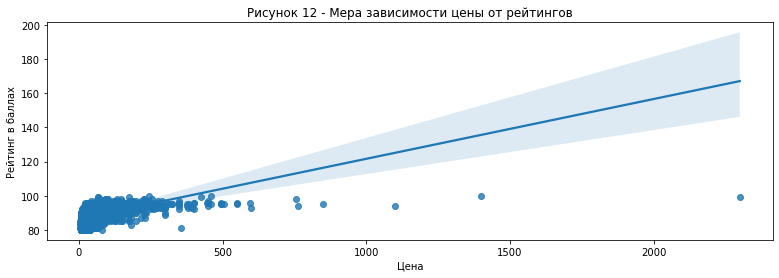

In [24]:
plt.figure(figsize=(13,4))
ax = sns.regplot(x="price", y="points", data=df)
plt.title('Рисунок 12 - Мера зависимости цены от рейтингов')
plt.xlabel('Цена')
plt.ylabel('Рейтинг в баллах')



Судя по матрице корреляции (0,42 далековато от единицы) и тому как на диаграмме рассеивания данные плохо ложатся на регрессионную прямую, можно сделать вывод  - существенной взаимосвязи между ценой и качеством вин в наших данных нет.
Можно ее оценить как 42.7%.


Существеной разницы между качеством и ценой нет, но все таки какое то отношение есть (42,7%), давайте попробуем выяснить оптимальную цену за вино для наших данных:

Text(0, 0.5, 'Рейтинг в баллах')

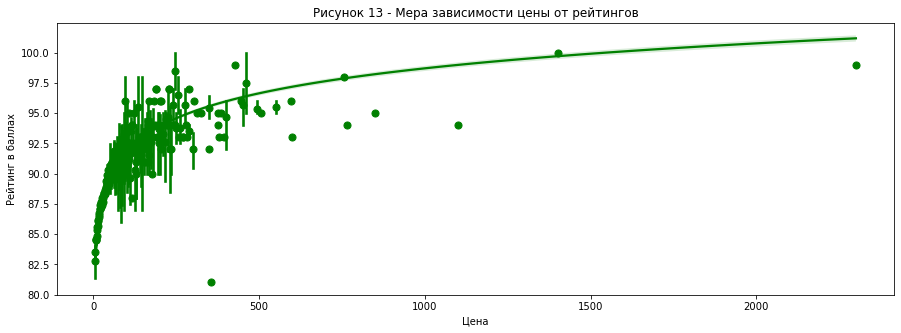

In [25]:
plt.figure(figsize=(15,5))
ax = sns.regplot(x=df["price"], y="points", data=df, x_estimator=np.mean, logx=True, truncate=True, color='g')
plt.title('Рисунок 13 - Мера зависимости цены от рейтингов')
plt.xlabel('Цена')
plt.ylabel('Рейтинг в баллах')

Видим, что цены основная масса рейтинговых вин в диапазоне до 500 долларов, посмотрим этот диапазон внимательно на jointplot

Text(27.0, 0.5, 'Рейтинг в баллах')

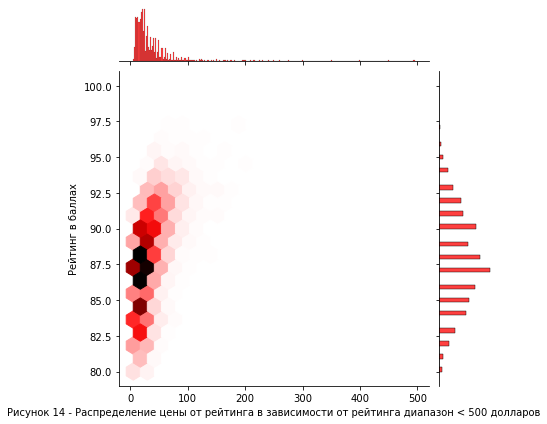

In [26]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 500], kind='hex',gridsize=20, color='r', alpha=None)

plt.xlabel('Рисунок 14 - Распределение цены от рейтинга в зависимости от рейтинга диапазон < 500 долларов')
plt.ylabel('Рейтинг в баллах')


Видим, что можно еще больше локализовать диапазон качественных вин - пока посмотрим до 100 долларов

Text(27.0, 0.5, 'Рейтинг в баллах')

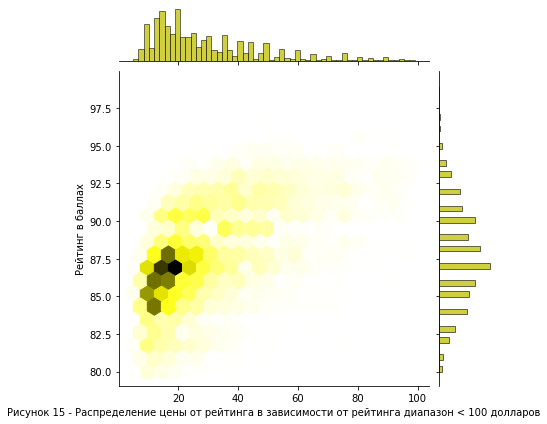

In [27]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 100], kind='hex',gridsize=20, color='y', alpha=None)

plt.xlabel('Рисунок 15 - Распределение цены от рейтинга в зависимости от рейтинга диапазон < 100 долларов')
plt.ylabel('Рейтинг в баллах')

Судя по графику,можно еще уменьшить диапазон выбора качествееных вин - посмотрим до 40 долларов

Text(27.0, 0.5, 'Рейтинг в баллах')

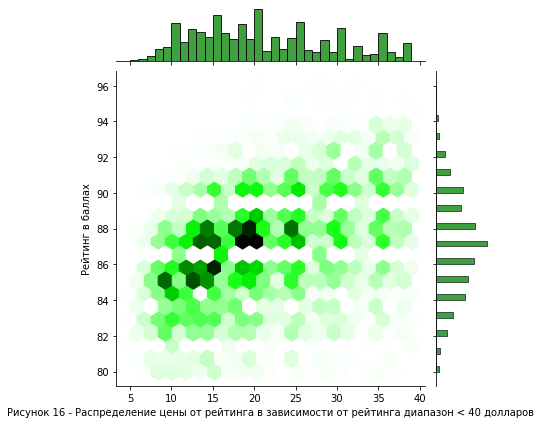

In [28]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 40], kind='hex',gridsize=20, color='g', alpha=None)

plt.xlabel('Рисунок 16 - Распределение цены от рейтинга в зависимости от рейтинга диапазон < 40 долларов')
plt.ylabel('Рейтинг в баллах')

Вот оно-зеленый цвет.По итогу работы нашего светофора мы знаем, что вина, которые стоят между 12 и 18 долларами,
имеют отличное соотношение цены к качеству и  будут для вас отличным выбором.

### 4. Составить портрет  региона для стран Европы и Америки

А что в стране где самые дорогие вина - из любого региона они дороги?
А что в стране больше всего рейтинов - из любого региона вина доступны?

Посмотрим как в странах Европы , например Франции(где мы фиксировали самые дорогие вина) и в Испании(где мы фиксировали наиболее доступные вина) распределены цены в зависимости от региона, в компанию им возьмем Италию(судя по боксплоту там хороший объем данных и страны самые ближайшие соседи по расположению). Все страны расположены на европейском континете и заслуженно являюся передовыми винодельческими странами. Это даст некоторое представление о распределении в Европе цен и рейтинга.

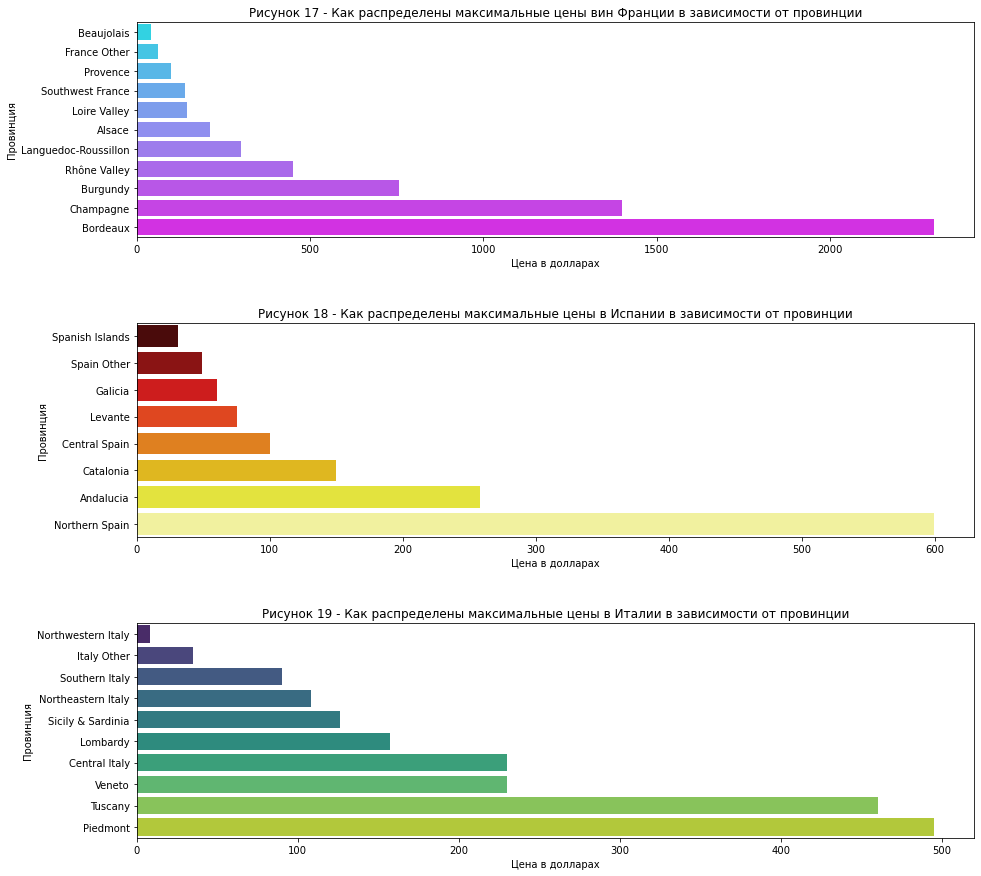

In [29]:
fr = df[df['country'] == 'France']
it = df[df['country'] == 'Italy']
sp = df[df['country'] == 'Spain']
fig,ax = plt.subplots(3,1,figsize=(15,15))
ax1,ax2,ax3 = ax.flatten()

cnt = fr.groupby(['province'])['price'].max().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('Рисунок 17 - Как распределены максимальные цены вин Франции в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = sp.groupby(['province'])['price'].max().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'hot',ax=ax2)
ax2.set_title('Рисунок 18 - Как распределены максимальные цены в Испании в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = it.groupby(['province'])['price'].max().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'viridis',ax=ax3)
ax3.set_title('Рисунок 19 - Как распределены максимальные цены в Италии в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')

plt.subplots_adjust(wspace=0.4, hspace=0.4)


Видим что наиболее дорогие вина во Франции(от 750 до 2300) - в Бордо (более 2300S!!!), Шамппане и Бургундии.  
Для испанских вин максимальные цены (от 150 до 600) видим в Каталонии, Андалузии и на Севере Испании.
В Италии наиболее дорогие вина(от 230 до 490) везут из Пьедмонта, Тасканы и Венето.

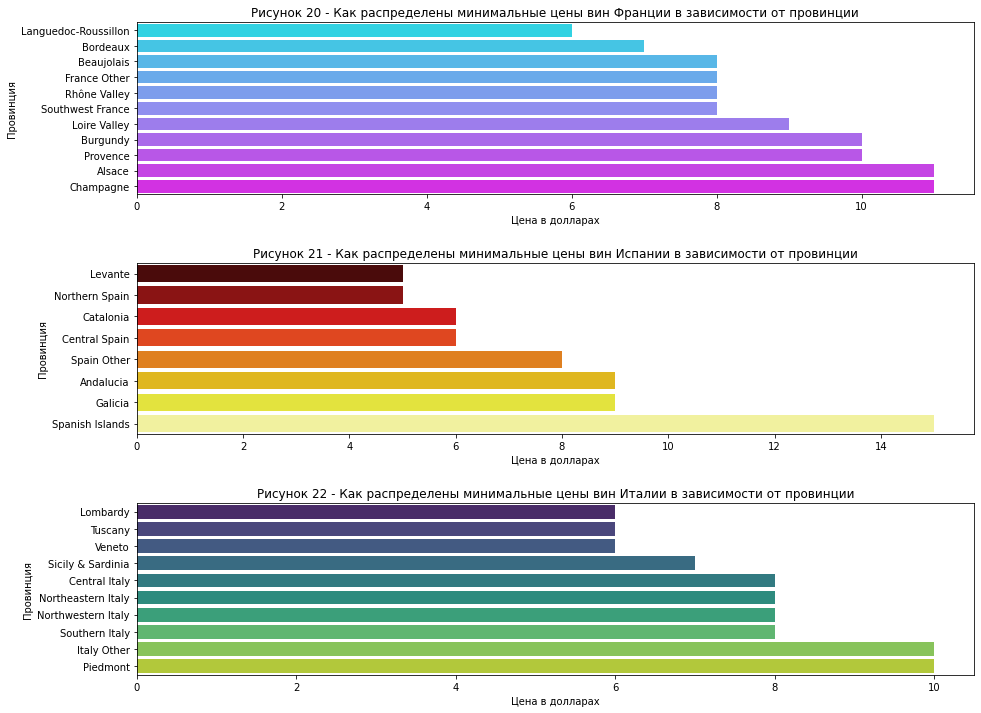

In [30]:
fr = df[df['country'] == 'France']
it = df[df['country'] == 'Italy']
sp = df[df['country'] == 'Spain']
fig,ax = plt.subplots(3,1,figsize=(15,12))
ax1,ax2,ax3 = ax.flatten()

cnt = fr.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('Рисунок 20 - Как распределены минимальные цены вин Франции в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = sp.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'hot',ax=ax2)
ax2.set_title('Рисунок 21 - Как распределены минимальные цены вин Испании в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = it.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'viridis',ax=ax3)
ax3.set_title('Рисунок 22 - Как распределены минимальные цены вин Италии в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')


plt.subplots_adjust(wspace=0.4, hspace=0.4)


По доступным винам во Франции в лидерах Лангедок, Бордо и Божоле (от 6 до 8),
в Испании это Леванта, Северная Испания и Каталония (от 5 до 6).
В Италии минимальная цена 6 долларов для вин Ломбардии,Тасканы и Венето.


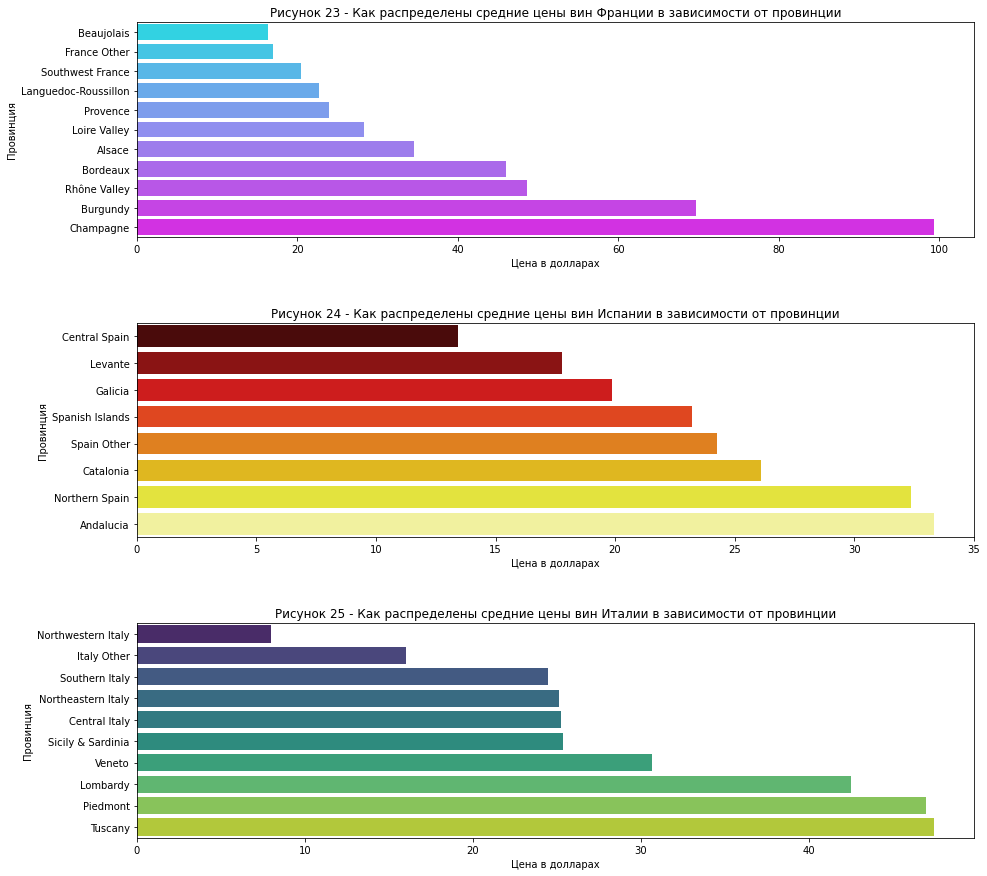

In [31]:
fr = df[df['country'] == 'France']
it = df[df['country'] == 'Italy']
sp = df[df['country'] == 'Spain']
fig,ax = plt.subplots(3,1,figsize=(15,15))
ax1,ax2,ax3 = ax.flatten()

cnt = fr.groupby(['province'])['price'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('Рисунок 23 - Как распределены средние цены вин Франции в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = sp.groupby(['province'])['price'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'hot',ax=ax2)
ax2.set_title('Рисунок 24 - Как распределены средние цены вин Испании в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = it.groupby(['province'])['price'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'viridis',ax=ax3)
ax3.set_title('Рисунок 25 - Как распределены средние цены вин Италии в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')


plt.subplots_adjust(wspace=0.4, hspace=0.4)



Наименьшие средние значения цен для Франции  найдены в Божоле и Лангедоке и Юго-Западе Франции, в Испании в Леванте,центре Испании и Галиции, а в Италии в Северо Западной и Южной Италии.

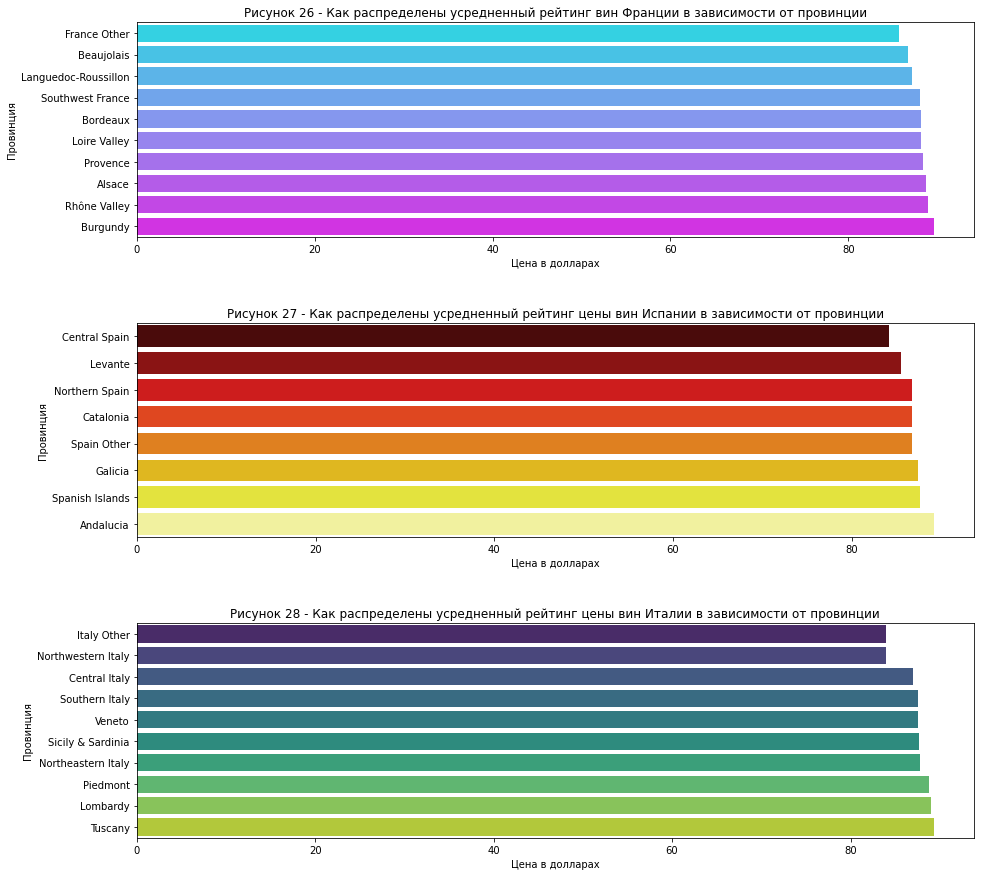

In [32]:
fr = df[df['country'] == 'France']
it = df[df['country'] == 'Italy']
sp = df[df['country'] == 'Spain']
fig,ax = plt.subplots(3,1,figsize=(15,15))
ax1,ax2,ax3 = ax.flatten()


cnt = fr.groupby(['province'])['points'].mean().sort_values(ascending=True).to_frame()[:10]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('Рисунок 26 - Как распределены усредненный рейтинг вин Франции в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = sp.groupby(['province'])['points'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax2)
ax2.set_title('Рисунок 27 - Как распределены усредненный рейтинг цены вин Испании в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = it.groupby(['province'])['points'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'viridis',ax=ax3)
ax3.set_title('Рисунок 28 - Как распределены усредненный рейтинг цены вин Италии в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [33]:
fr['points'].describe()

count    1929.000000
mean       88.640228
std         3.083412
min        80.000000
25%        86.000000
50%        88.000000
75%        91.000000
max       100.000000
Name: points, dtype: float64

In [34]:
sp['points'].describe()

count    1074.000000
mean       86.512104
std         3.112124
min        80.000000
25%        84.000000
50%        87.000000
75%        88.000000
max        97.000000
Name: points, dtype: float64

In [35]:
it['points'].describe()

count    2472.000000
mean       88.384304
std         2.798140
min        80.000000
25%        87.000000
50%        88.000000
75%        90.000000
max       100.000000
Name: points, dtype: float64

Теперь можно сделать вывод, что в зависимости от провинции во Франции цены могут сильно отличаться,
так в Бордо, Шампане и Бургундии ценник может удивлять(Бордо 2300$),но при этом там есть и очень недогогие экземпляры(от 8 до 10 долларов)
а в Божоле и в Лангедоке - цены вполне демократичные, причем минималько это 6 долларов. Средние значение для вина Франции в зависимости от региона от 18 до 100 долларов. При этом все вина в среднем имеют приличный рейтинг выше среднего (88.6 баллов).

В Италии картина похожая там есть и  дорогие коллекционные вина - в Пьедмонте, Таскане и Венето, 
при этом в тех же регионах (Таскане и Венето) нашлись и самые недорогие экземляры итальянских виноделов, 
которорые стоили 6 долларов. Средние значения стоимости вин  по Италии  от 8 до 46 долларов,
при этом усредненный рейтинг выше среднего (88 баллов).

Аналогичная ситуация и в Испании - например на севере Испании, в Андалузии и Каталонии цены бывают высокими, но при этом там в той же Каталонии и Леванте можно найти вино за 5-6 долларов . Средние значения цен по Испании в завимимости от региона стоимость вина от 13 до 33 долларов. По рейтингам Испанские вина стремятся к лучшим средним (86 баллов).

В целом можно сказать, что  в странах Европы выбор вин очень разнообразен на любой вкус и кошелек, 
при это, в среднем, у всех вин Франции, Италии и Испании очень хорошие рейтинги.

Теперь хотелось бы понять как обстоят дела на американском континете.
Какая картина у лидера по количеству отзывов США? Как у них цены по регионам?А рейтинги?
Предлагаю посмотреть их совместно с ближайшими соседями по континенту Мексикой и Канадой:

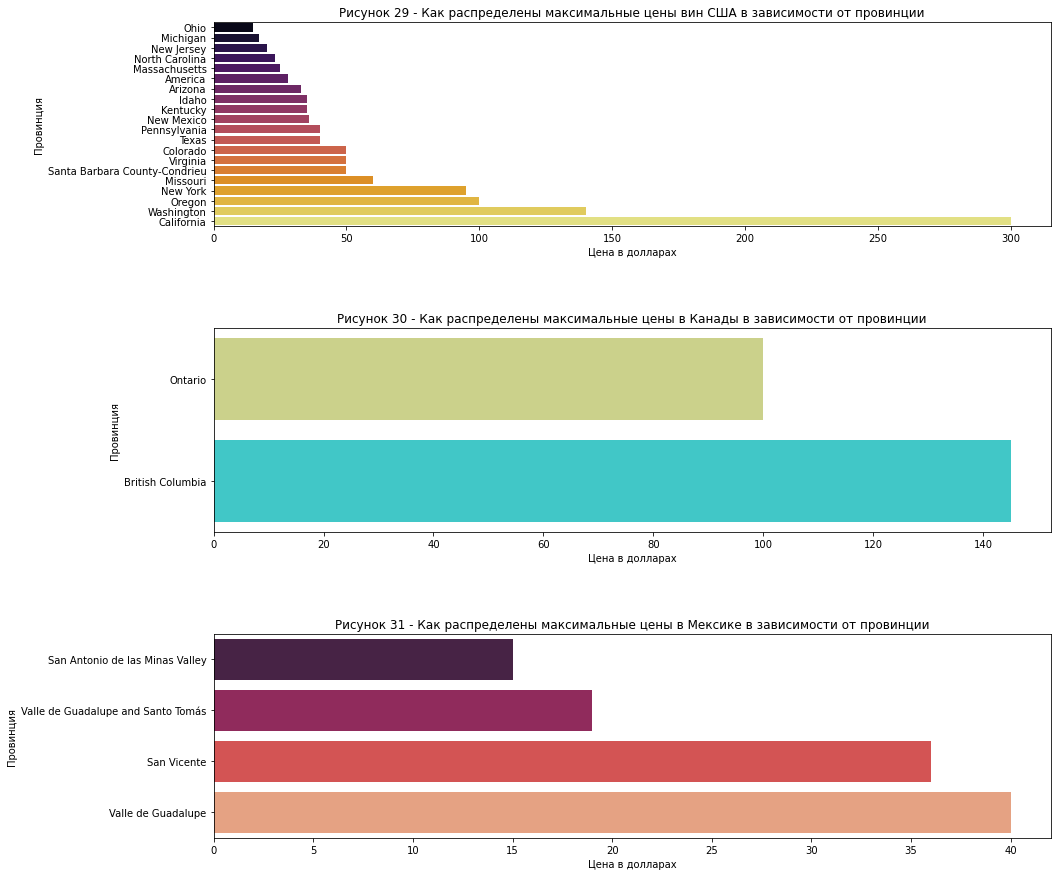

In [36]:
us = df[df['country'] == 'US']
cnd = df[df['country'] == 'Canada']
mx = df[df['country'] == 'Mexico']
fig,ax = plt.subplots(3,1,figsize=(15,15))
ax1,ax2,ax3 = ax.flatten()

cnt = us.groupby(['province'])['price'].max().sort_values(ascending=True).to_frame()[:100]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 29 - Как распределены максимальные цены вин США в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = cnd.groupby(['province'])['price'].max().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'rainbow_r',ax=ax2)
ax2.set_title('Рисунок 30 - Как распределены максимальные цены в Канады в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = mx.groupby(['province'])['price'].max().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'rocket',ax=ax3)
ax3.set_title('Рисунок 31 - Как распределены максимальные цены в Мексике в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')

plt.subplots_adjust(wspace=0.1, hspace=0.5)


Видимо самый винодельческий штат в США Калифорния, 
именно там обнаружен вино с максимальной ценой (около 300 долларов),следом за ним Вашингтон и Орегон. 
В Канаде в лидерах Британская Колумбия(140$), за ним Онтарио.
В Мексике самое дорогое вино в штате Валле де Гуаделупе около 40 долларов. 

Ну и уже понятно, даже самые дорогие вина стран этого континента ценятся
гораздо менее высоко чем вина стран европейского континета.




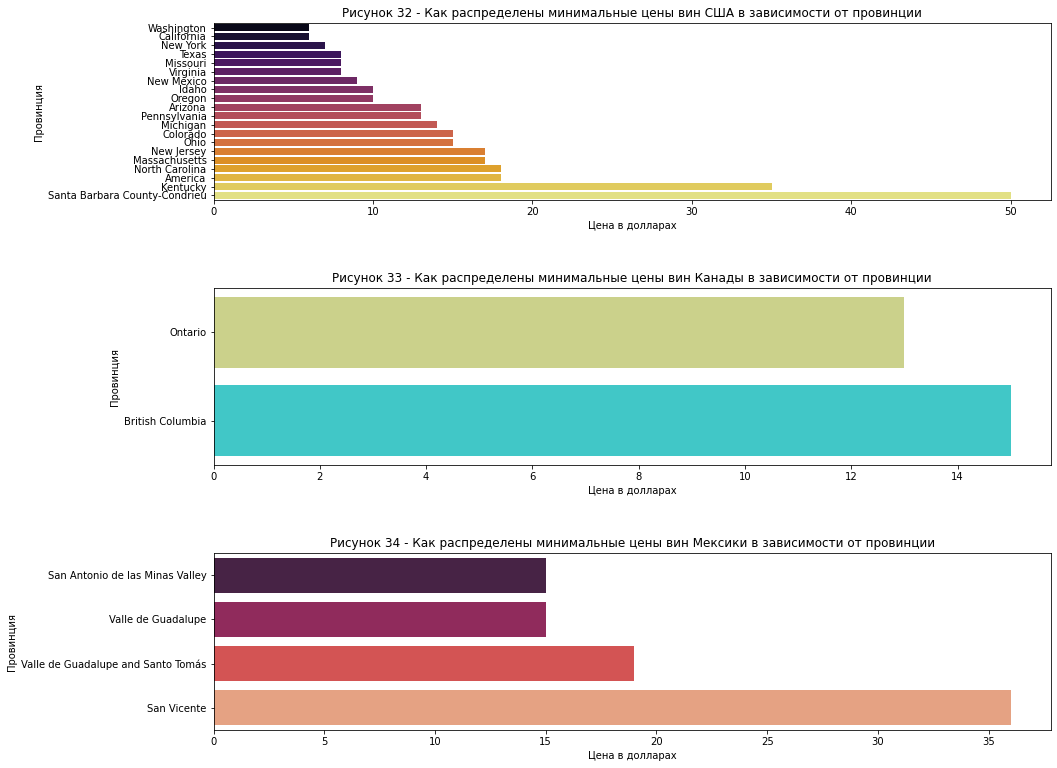

In [37]:
us = df[df['country'] == 'US']
cnd = df[df['country'] == 'Canada']
mx = df[df['country'] == 'Mexico']
fig,ax = plt.subplots(3,1,figsize=(15,13))
ax1,ax2,ax3 = ax.flatten()

cnt = us.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:100]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 32 - Как распределены минимальные цены вин США в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = cnd.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'rainbow_r',ax=ax2)
ax2.set_title('Рисунок 33 - Как распределены минимальные цены вин Канады в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = mx.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'rocket',ax=ax3)
ax3.set_title('Рисунок 34 - Как распределены минимальные цены вин Мексики в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')

plt.subplots_adjust(wspace=0.1, hspace=0.5)




Что касается недорогих вин в США (от 6 до 7 долларов) - такие есть в Калифорнии, Вашингтоне и Нью-Йорке.
В Канаде это Онтарио (13 долларов)
А в Мексике - Сан Антонио де лас Минас и Валле де Гуаделупа (15 долларов)

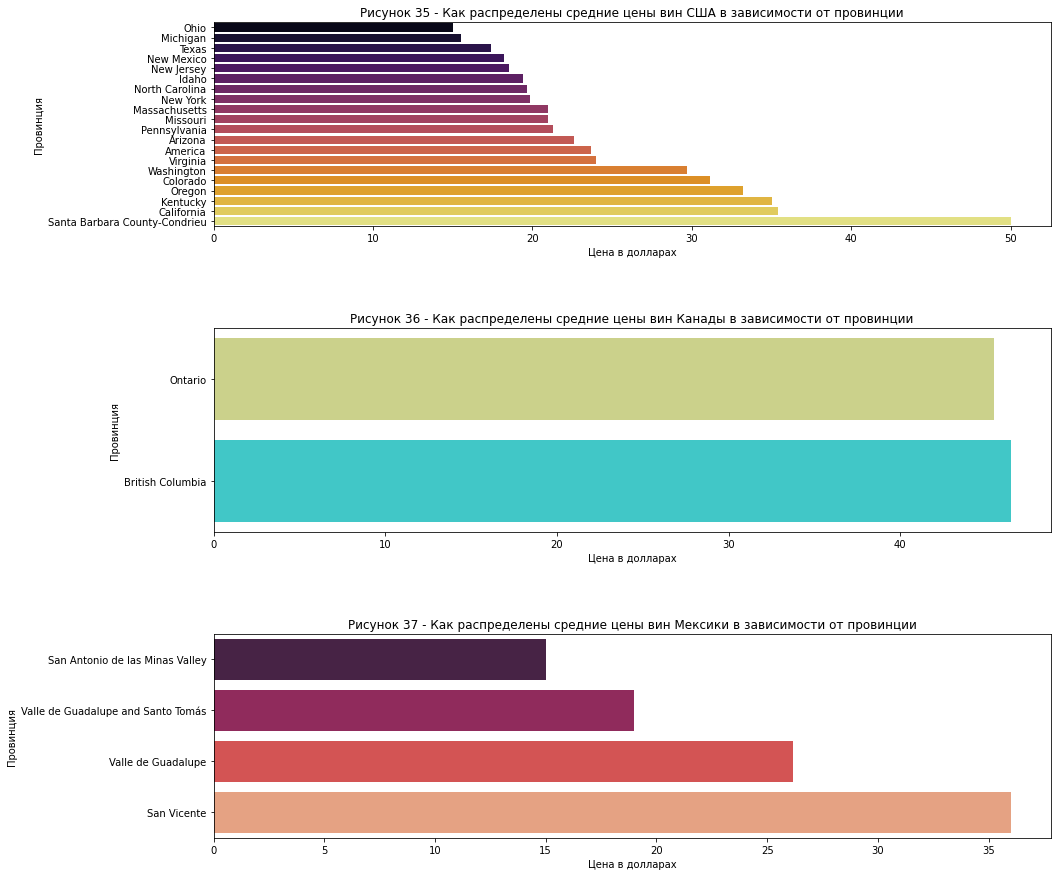

In [38]:
us = df[df['country'] == 'US']
cnd = df[df['country'] == 'Canada']
mx = df[df['country'] == 'Mexico']
fig,ax = plt.subplots(3,1,figsize=(15,15))
ax1,ax2,ax3 = ax.flatten()

cnt = us.groupby(['province'])['price'].mean().sort_values(ascending=True).to_frame()[:100]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 35 - Как распределены средние цены вин США в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = cnd.groupby(['province'])['price'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'rainbow_r',ax=ax2)
ax2.set_title('Рисунок 36 - Как распределены средние цены вин Канады в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = mx.groupby(['province'])['price'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'rocket',ax=ax3)
ax3.set_title('Рисунок 37 - Как распределены средние цены вин Мексики в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')

plt.subplots_adjust(wspace=0.1, hspace=0.5)




По средним ценам в США - от 15 до 35 долларов (минимально в Мичигане и Огайо , максимально в Калифорнии Кентуки).
В Канаде - около 45!!! в Онтарио и Британской Колумбии.
А в Мексике средне минимально 15 долларов в Сан Антонио де лас Минас до максимально 36 в Сан Висенте.

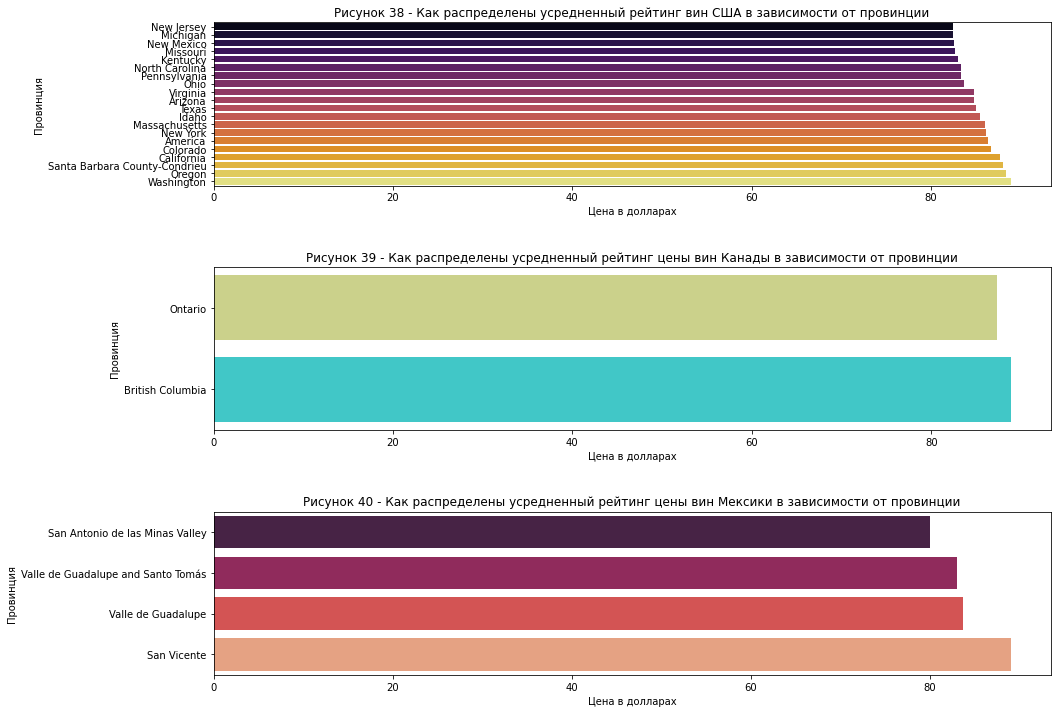

In [39]:
us = df[df['country'] == 'US']
cnd = df[df['country'] == 'Canada']
mx = df[df['country'] == 'Mexico']
fig,ax = plt.subplots(3,1,figsize=(15,12))
ax1,ax2,ax3 = ax.flatten()

cnt = us.groupby(['province'])['points'].mean().sort_values(ascending=True).to_frame()[:100]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 38 - Как распределены усредненный рейтинг вин США в зависимости от провинции' )
ax1.set_ylabel('Провинция')
ax1.set_xlabel('Цена в долларах')

cnt = cnd.groupby(['province'])['points'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'rainbow_r',ax=ax2)
ax2.set_title('Рисунок 39 - Как распределены усредненный рейтинг цены вин Канады в зависимости от провинции' )
ax2.set_ylabel('Провинция')
ax2.set_xlabel('Цена в долларах')

cnt = mx.groupby(['province'])['points'].mean().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'rocket',ax=ax3)
ax3.set_title('Рисунок 40 - Как распределены усредненный рейтинг цены вин Мексики в зависимости от провинции' )
ax3.set_ylabel('Провинция')
ax3.set_xlabel('Цена в долларах')


plt.subplots_adjust(wspace=0.1, hspace=0.5)

In [40]:
us['points'].describe()

count    8208.000000
mean       87.823343
std         3.438680
min        80.000000
25%        85.000000
50%        88.000000
75%        90.000000
max       100.000000
Name: points, dtype: float64

In [41]:
cnd['points'].describe()

count    24.000000
mean     87.750000
std       2.832267
min      82.000000
25%      85.750000
50%      88.000000
75%      90.000000
max      92.000000
Name: points, dtype: float64

In [42]:
mx['points'].describe()

count    14.000000
mean     83.714286
std       2.614415
min      80.000000
25%      81.250000
50%      83.500000
75%      85.000000
max      89.000000
Name: points, dtype: float64

На американском континенте наибольшее разнообразие у вин США и похоже что в лидерах там штат Калифорния за ним Вашингтон.
В этих Штатах представлены и дорогие вина (в Калифорнии - 300 долларов за вино) и недорогие за 6-7 долларов
Средний рейтинг по стране близок к среднему по всем данным.
Канадские вина представлены только в двух штатах Онтарио  и Британская Колумбия, 
максимальная цена в Британской Колумбии(140 $), минимальнано в Онтарио (13 долларов), ну а в среднем около 45 долларов (существенно дороже чем во многих странах Европы).
Рейтинги вин стремятся к среднему по всем странам.
В Мексике особо дорогих вин не обнаружено, но при этом и минимальная цена 
дороже многих(15 долларов в Сан Антонио де лас Минас).
В среднем рейтинги ниже средних. Видимо виноделие у них пока развивается.




Ну и в целом вина Американского континета выглядят слабее на фоне вин Европы.
Такого многобразия вин на любой вкус и кошелек там не найдешь, разве что в США (Калифорния и Вашингтон),
но все таки коллекционные вина Франции, Италии и Испании ценятся в разы дороже. 
При этом, надо иметь ввиду что рейтинги выставлены Wine Enthusiast Magazine , журналом в США.
Видимо сильна еще европейская винная традиция.


Однако, судя по рейтингам хорошие варианты по цене и качеству у них есть.

### 5.  Проведите исследование статистических показателей

In [43]:
mu = df['price'].mean()
sigma = df['price'].std(ddof=0)
print("Средняя цена вин по всем данным: ", round(mu,2), ", Среднее отклонение цены вин по всем данным:", round(sigma,2))

Средняя цена вин по всем данным:  33.21 , Среднее отклонение цены вин по всем данным: 39.72


In [44]:
df_fr = df[df['country'] == 'France']
mu = df_fr['price'].mean()
sigma = df_fr['price'].std(ddof=0)
print("Средняя цена вин Франции: ", round(mu,2), ", Среднее отклонение цены вин Франции:", round(sigma,2))

Средняя цена вин Франции:  46.3 , Среднее отклонение цены вин Франции: 84.0


In [45]:
df_sp = df[df['country'] == 'Spain']
mu = df_sp['price'].mean()
sigma = df_sp['price'].std(ddof=0)
print("Средняя цена вин Испании: ", round(mu,2), ", Среднее отклонение цены вин Испании :", round(sigma,2))

Средняя цена вин Испании:  27.94 , Среднее отклонение цены вин Испании : 39.48


In [46]:
df_it = df[df['country'] == 'Italy']
mu = df_it['price'].mean()
sigma = df_it['price'].std(ddof=0)
print("Средняя цена вин Италии: ", round(mu,2), ", Среднее отклонение цены вин Италии :", round(sigma,2))

Средняя цена вин Италии:  37.18 , Среднее отклонение цены вин Италии : 38.06


In [47]:
df_us = df[df['country'] == 'US']
mu = df_us['price'].mean()
sigma = df_us['price'].std(ddof=0)
print("Средняя цена вин США: ", round(mu,2), ", Среднее отклонение цены вин США :", round(sigma,2))

Средняя цена вин США:  33.54 , Среднее отклонение цены вин США : 23.22


In [48]:
df_cd = df[df['country'] == 'Canada']
mu = df_cd['price'].mean()
sigma = df_cd['price'].std(ddof=0)
print("Средняя цена вин Канады: ", round(mu,2), ", Среднее отклонение цены вин Канады :", round(sigma,2))

Средняя цена вин Канады:  45.75 , Среднее отклонение цены вин Канады : 34.01


In [49]:
df_mx = df[df['country'] == 'Mexico']
mu = df_mx['price'].mean()
sigma = df_mx['price'].std(ddof=0)
print("Средняя цена вин Мексики: ", round(mu,2), ", Среднее отклонение цены вин Мексики:", round(sigma,2))

Средняя цена вин Мексики:  25.57 , Среднее отклонение цены вин Мексики: 7.36


Text(0.5, 0, '')

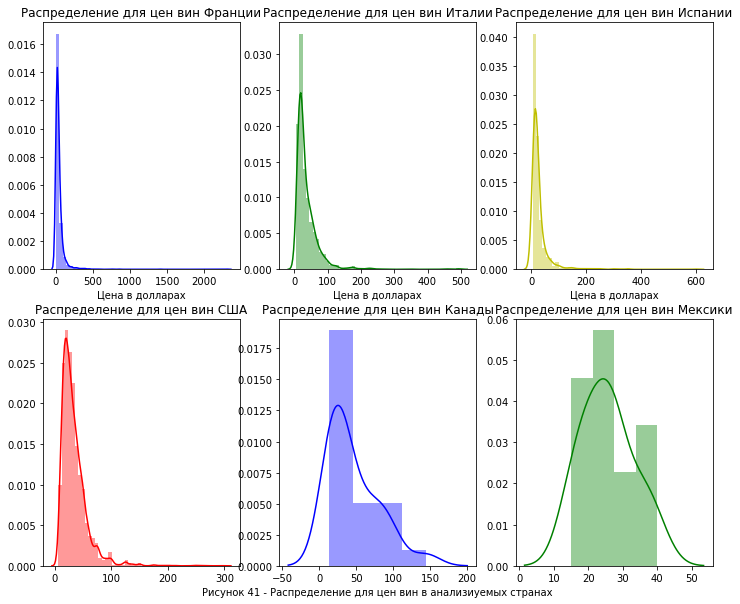

In [50]:
fig,ax = plt.subplots(2,3,figsize=(12,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()

sns.distplot(df_fr['price'], color='b',ax=ax1)
ax1.set_title('Распределение для цен вин Франции' )
ax1.set_ylabel('')
ax1.set_xlabel('Цена в долларах')

sns.distplot(df_it['price'], color='g',ax=ax2)
ax2.set_title('Распределение для цен вин Италии' )
ax2.set_ylabel('')
ax2.set_xlabel('Цена в долларах')

sns.distplot(df_sp['price'], color='y',ax=ax3)
ax3.set_title('Распределение для цен вин Испании' )
ax3.set_ylabel('')
ax3.set_xlabel('Цена в долларах')

sns.distplot(df_us['price'], color='r',ax=ax4)
ax4.set_title('Распределение для цен вин США' )
ax4.set_ylabel('')
ax4.set_xlabel('')

sns.distplot(df_cd['price'], color='b',ax=ax5)
ax5.set_title('Распределение для цен вин Канады' )
ax5.set_ylabel(' ')
ax5.set_xlabel('Рисунок 41 - Распределение для цен вин в анализиуемых странах')

sns.distplot(df_mx['price'], color='g',ax=ax6)
ax6.set_title('Распределение для цен вин Мексики' )
ax6.set_ylabel('')
ax6.set_xlabel('')

Распределение Гауссовское, используем Т-критерий Стьюдента для проверки гипотез по нашим данным.

### 6. Проверка гипотез

Проверим гипотезу насколько средняя цена в наших данных приближена к цене по выбранным странам Европы и Америки.
Критический уровень статистической значимости задаем равный 0.05 (т.е 5%).

Сама гипотеза звучит так:
    
Нулевая гипотеза: среднее цена вин из [Страна] примерно равна 33.21.

Альтернативная гипотеза: среднее цена вин [Страна] не равна 33.21

Для Французских вин:

In [51]:
scooters = df_fr['price']
optimal_value = 33.21   # введите ваш код тут
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_1samp(scooters, optimal_value)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0483684327402345e-11
Отвергаем нулевую гипотезу


Для Французских это не так, цена отличается от средей по нашим данным (для 5% уровня значимости)

In [52]:
scooters = df_it['price']
optimal_value = 33.21   # введите ваш код тут
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_1samp(scooters, optimal_value)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.380772061086315e-07
Отвергаем нулевую гипотезу


Для Итальянских вин это не так, цена отличается от средей по нашим данным (для 5% уровня значимости)

Для Испанских вин:

In [53]:
scooters = df_sp['price']
optimal_value = 33.21   # введите ваш код тут
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_1samp(scooters, optimal_value)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.3424356055285608e-05
Отвергаем нулевую гипотезу


Для Испанских вин это не так, цена отличается от средей по нашим данным (для 5% уровня значимости)

In [54]:
scooters = df_us['price']
optimal_value = 33.21   # введите ваш код тут
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_1samp(scooters, optimal_value)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.19892869829681803
Не получилось отвергнуть нулевую гипотезу


Зато это верно для вин США - средняя цена у них приближена к средней цене по всем странам

In [55]:
scooters = df_mx['price']
optimal_value = 33.21   # введите ваш код тут
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_1samp(scooters, optimal_value)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.002453701202938939
Отвергаем нулевую гипотезу


И для Мексики это не так, цена отличается от средней по нашим данным (для 5% уровня значимости)

In [56]:
scooters = df_cd['price']
optimal_value = 33.21   # введите ваш код тут
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_1samp(scooters, optimal_value)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0903088494381953
Не получилось отвергнуть нулевую гипотезу


А для Канады гипотеза верна

Проверка гипотезы показала, что для вин США  и Канады цена приближена к средней по всему набору данных, а вина Франции, Испании и Мексики отличаются по цене от средней.

А теперь проверим страны по ценам друг с другом:

In [57]:
alpha = 0.05

results = st.ttest_ind(df_fr['price'], df_sp['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6876515402703377e-11
Отвергаем нулевую гипотезу


In [58]:
alpha = 0.05

results = st.ttest_ind(df_fr['price'], df_it['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6197535562297338e-06
Отвергаем нулевую гипотезу


In [59]:
alpha = 0.05

results = st.ttest_ind(df_sp['price'], df_it['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.98407022020403e-11
Отвергаем нулевую гипотезу


In [60]:
alpha = 0.05

results = st.ttest_ind(df_fr['price'], df_us['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0470478526089425e-32
Отвергаем нулевую гипотезу


In [61]:
alpha = 0.05

results = st.ttest_ind(df_sp['price'], df_us['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7893630056574224e-11
Отвергаем нулевую гипотезу


In [62]:
alpha = 0.05

results = st.ttest_ind(df_it['price'], df_us['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.237029789908194e-09
Отвергаем нулевую гипотезу


In [63]:
alpha = 0.05

results = st.ttest_ind(df_sp['price'], df_mx['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8226494812603486
Не получилось отвергнуть нулевую гипотезу


In [64]:
alpha = 0.05

results = st.ttest_ind(df_fr['price'], df_mx['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.35624570605848704
Не получилось отвергнуть нулевую гипотезу


In [65]:
alpha = 0.05

results = st.ttest_ind(df_it['price'], df_mx['price'])  

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.25424657028657793
Не получилось отвергнуть нулевую гипотезу


В результате проверки гипотез получили что вина из Франции и Испании, Италии в среднем сравнимы по цене с Мексикой, но сравнение это очевидно некорректно из за малого количества данных о винах Мексики (то что данных о ценах немного видно из графиков)

### 7. Выводы

В исследовании участвовало 37 стран, при это наибольшее количество отзывов 8207 было у вин США.
Видимо это связано с тем что,  Wine Enthusiast Magazine базируется в Соединенных Штатах.

По результам анализа данных было получено, что:
    
В среднем самые дорогие вина в Венгрии, Франции, Канаде.
А в среднем самые недорогие вина в Южной Корее, Болгарии и Монтенегро.
Во Франции встречаются очень дорогие вина (максимальная стоимость 2300 доларов), за ней следует Австрия.
Вино по самой низкой цене 5 долларов были найдены среди вин Португалии, Испании, Австралии.

В большинстве европейских стран продается широкий ассортимент вин.

Рейтинг вина варьируется от 0 до 100, но наименьший рейтинг для вин в наших данных 80.
Вина, произведенные в США, Франции, Италии Португалии получает высокую оценку.
Вина, произведенное в Аргентине, Мексике, Новой Зеландии и Румынии имеют наименьший бал.
В общем все логично - мало кто слышал про мексиканские вина, в основном Франция и Италия.

В нашем наборе данных было представлен 406 сортов винограда, при этом ,
самые дорогие - это Бордо и Шардонэ, а самые рейтинговые - это Мерло,Кабернэ, Шардонэ.

Существенной разницы между качеством и ценой мы не увидели, но при этом выяснили,
что вина, которые стоят между 12 и 18 долларами, имеют отличное отношение цены к качеству
и будут для вас лучшим выбором.   

Попадание большого числа хороших рейтингов в этот ценовой сегмент может быть связано с ценой этих вин или тем фактом,
что большинство потребителей пьют дорогие вина реже или только в особых случаях.
Возможно для производителей вина имеет смысл сосредоточиться на рыночном спросе на свою продукцию
и направить свои ресурсы  именно в этот сегмет рынка.

При этом стало понятно, что во Франции, стране, где мы увидели самые дорогие вина цены могут
существенно отличаться, в зависимости от региона производства.
Так в Бордо, Шампане и Бургундии ценник может удивлять(Бордо 2300$),
но при этом там есть и очень недогогие экземпляры(от 8 до 10 долларов),
а в Божоле и в Лангедоке - цены вполне демократичные, причем минималько это 6 долларов.
В среднем вина Франции в зависимости от региона от от 18 до 100 долларов.
При этом все вина в среднем имеют приличный рейтинг выше среднего (88.6 баллов).

В Италии картина похожая там есть и дорогие коллекционные вина - в Пьедмонте, Таскане и Венето,
при этом в тех же регионах (Таскане и Венето) нашлись и самые недорогие экземляры итальянских виноделов,
которорые стоили 6 долларов. 
В среднем по Италии стоимость вин от 8 до 46 долларов, при этом усредненный рейтинг выше среднего (88 баллов).

Аналогичная ситуация и в Испании - например на севере Испании, в Андалузии и Каталонии цены бывают высокими,
но при этом там в той же Каталонии и Леванте можно найти вино за 5-6 долларов. 
В среднем по Испании в завимимости от региона стоимость вина от 13 до 33 долларов.
По рейтингам Испанские вина стремятся к лучшим средним (86 баллов).

В целом можно сказать, что  в странах Европы выбор вин очень разнообразен на любой вкус и кошелек,
при это, в среднем, у всех вин Франции, Италии и Испании отличные рейтинги.

На американском континенте наибольшее разнообразие у вин США , в лидерах там штат Калифорния за ним Вашингтон.
В этих Штатах представлены и дорогие вина (в Калифорнии - 300 долларов за вино) и недорогие за 6-7 долларов.
Средний рейтинг по стране близок к среднему по всем данным. 

Канадские вина представлены только в двух штатах Онтарио Британская Колумбия, 
максимальная цена в Британской Колумбии(140 $), 
минимальнано в Онтарио (13 долларов), ну а в среднем около 45,что дороже многих  европейских. 
Рейтинги вин стремятся к среднему по всем странам. 


В Мексике особо дорогих вин не обнаружено, 
но при этом и минимальная цена довольно высока (15 долларов в Сан Антонио де лас Минас).
В среднем рейтинги ниже средних. Видимо виноделие у них пока развивается.

Похоже американцы все свои винодельческие силы направили в тот самый сегмент, где большой спрос.
В целом вина Американского континета слабо выглядят на фоне вин Европы. 
Такого многобразия вин на любой вкус и кошелек там не найдешь, разве что в США (Калифорния и Вашингтон), 
но все таки коллекционные вина Франции, Италии и Испании ценятся в разы дороже.
Видимо сильна еще европейская винная традиция.
При этом, надо иметь ввиду что рейтинги выставлены Wine Enthusiast Magazine , журналом в США.

Также, проверка гипотезы показала, что для вин США и Канады цена приближена к средней по всему набору данных,
а вина Франции, Испании и Мексики отличаются по цене от средней.
Видимо их производители США и Канады действительно направили все свои усилия в тот сегмент рынка, 
где есть большой спрос.
По результатам проверки другой гипотезы было получено, что вина из Франции и Испании и Италии
в среднем сравнимы по цене с Мексикой, но это сравнение может быть некорректным из за малого количества данных о винах Мексики.